In [ ]:
# Step 1: Install Required Libraries
!pip install ultralytics
!pip install roboflow

from IPython.display import display, Image
import os

In [ ]:
# Step 2: Mount Google Drive (where your data is stored)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BASE_DIR = '/content/drive/MyDrive/Solar Panels Defect Detection/sample_dataset'

TRAIN_IMAGES = f'{BASE_DIR}/train/images'
TRAIN_LABELS = f'{BASE_DIR}/train/labels'
VAL_IMAGES   = f'{BASE_DIR}/val/images'
VAL_LABELS   = f'{BASE_DIR}/val/labels'
TEST_IMAGES  = f'{BASE_DIR}/test/images'
TEST_LABELS  = f'{BASE_DIR}/test/labels'

In [ ]:
# Step 4: Verify Number of Files
def count_files(folder):
    if os.path.exists(folder):
        return len([f for f in os.listdir(folder) if f.endswith(('.jpg', '.jpeg', '.png'))])
    else:
        print(f"⚠️ Folder not found: {folder}")
        return 0

print("📊 Dataset Summary:")
print(f"Train Images: {count_files(TRAIN_IMAGES)} | Labels: {len(os.listdir(TRAIN_LABELS)) if os.path.exists(TRAIN_LABELS) else 0}")
print(f"Val Images:   {count_files(VAL_IMAGES)}   | Labels: {len(os.listdir(VAL_LABELS)) if os.path.exists(VAL_LABELS) else 0}")
print(f"Test Images:  {count_files(TEST_IMAGES)}  | Labels: {len(os.listdir(TEST_LABELS)) if os.path.exists(TEST_LABELS) else 0}")

📊 Dataset Summary:
Train Images: 106 | Labels: 135
Val Images:   24   | Labels: 32
Test Images:  31  | Labels: 37


In [ ]:
# Step 5: Create dataset.yaml for YOLOv8
yaml_content = f"""
train: {TRAIN_IMAGES}
val: {VAL_IMAGES}

nc: 12
names: ['crack', 'finger', 'black_core', 'thick_line', 'star_crack','corner', 'fragment', 'scratch', 'horizontal_dislocation', 'vertical_dislocation', 'printing_error', 'short_circuit']
"""

with open('dataset.yaml', 'w') as f:
    f.write(yaml_content)

print("✅ Created dataset.yaml")

✅ Created dataset.yaml


In [ ]:
# Step 6: Load Pre-Trained YOLOv8 Model and Fine-Tune
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

results = model.train(
    data='dataset.yaml',
    epochs=50,
    imgsz=512,
    batch=16,
    name='solar_defect_detection_v1',
    augment=True,
    workers=2,
    patience=10,         # Stop early if no improvement
    lr0=0.001,            # Learning rate
    freeze = 10,
)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=solar_defect_detection_v13, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose

In [ ]:
# Step 7: Validate the Model
metrics = model.val()  # Evaluate on validation set
print(metrics.box.map)  # mAP50-95

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 80.2±91.2 MB/s, size: 204.0 KB)
val: Scanning /content/drive/MyDrive/Solar Panels Defect Detection/sample_dataset/val/labels.cache... 17 images, 7 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 24/24 52.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 0.8it/s 2.4s
                   all         24         56      0.529      0.595      0.612      0.412
                 crack          5         11      0.359     0.0909      0.313      0.158
                finger          7         14      0.702      0.429      0.553      0.301
            black_core          3          3      0.103          1      0.995      0.962
            thick_line          1          1          0          0     0.0498     0.0348
     


image 1/1 /content/drive/MyDrive/Solar Panels Defect Detection/sample_dataset/test/images/img000686.jpg: 512x512 1 star_crack, 95.0ms
Speed: 2.0ms preprocess, 95.0ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)


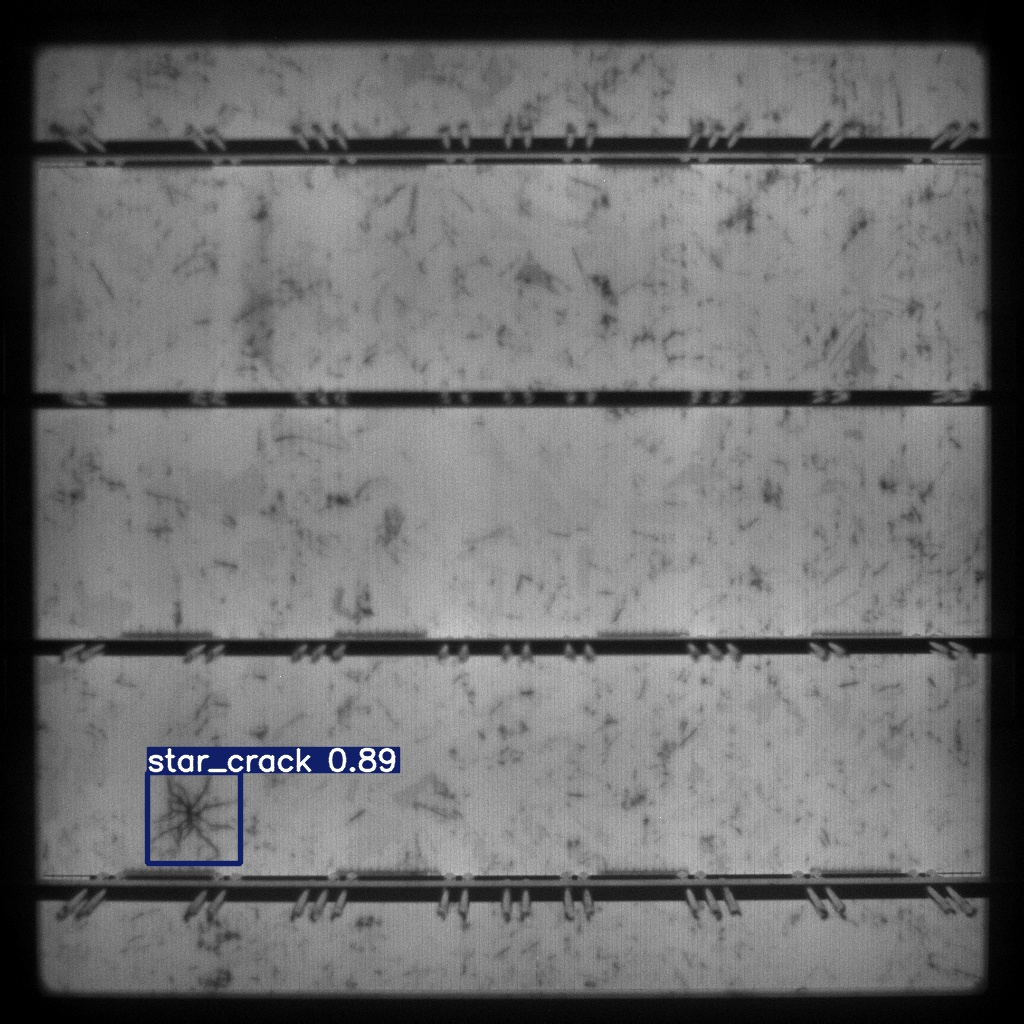


image 1/1 /content/drive/MyDrive/Solar Panels Defect Detection/sample_dataset/test/images/img000389.jpg: 512x512 1 crack, 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)


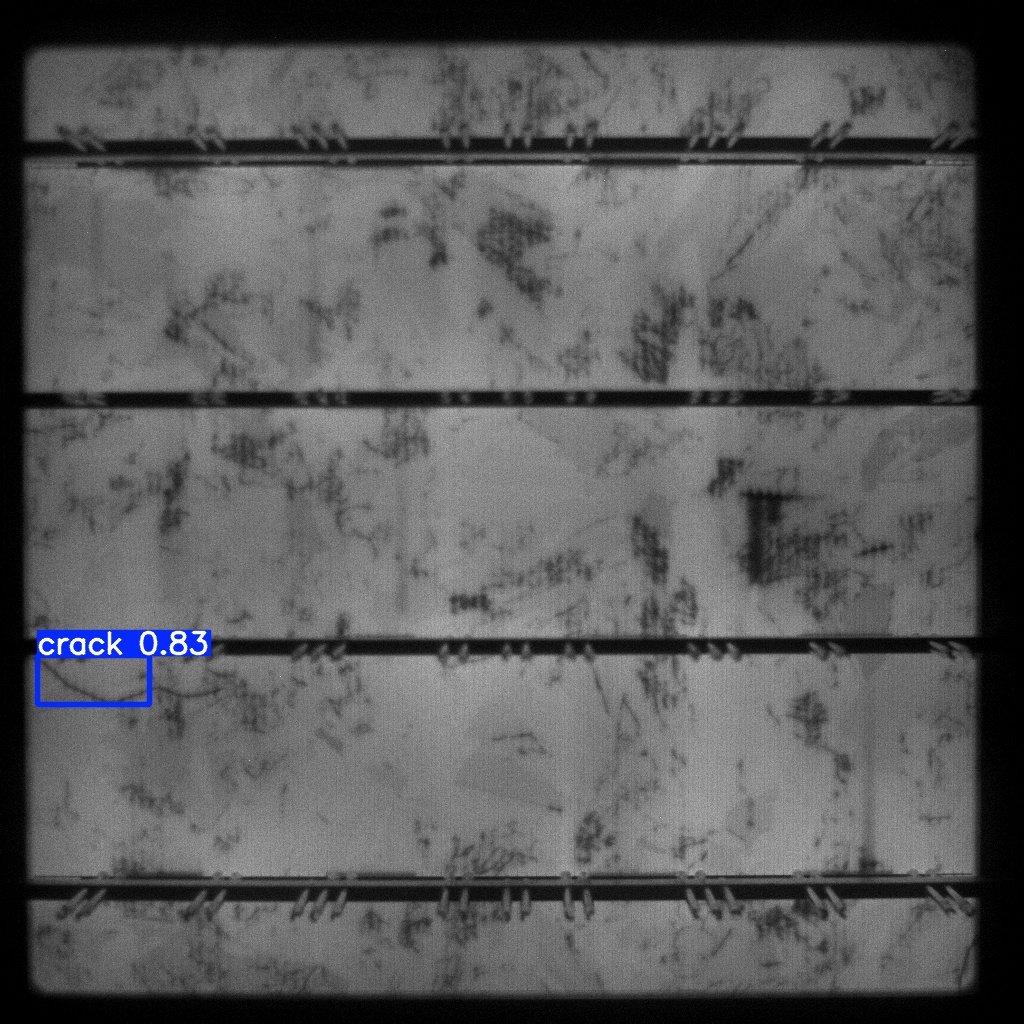


image 1/1 /content/drive/MyDrive/Solar Panels Defect Detection/sample_dataset/test/images/img000563.jpg: 512x512 5 star_cracks, 33.2ms
Speed: 2.0ms preprocess, 33.2ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)


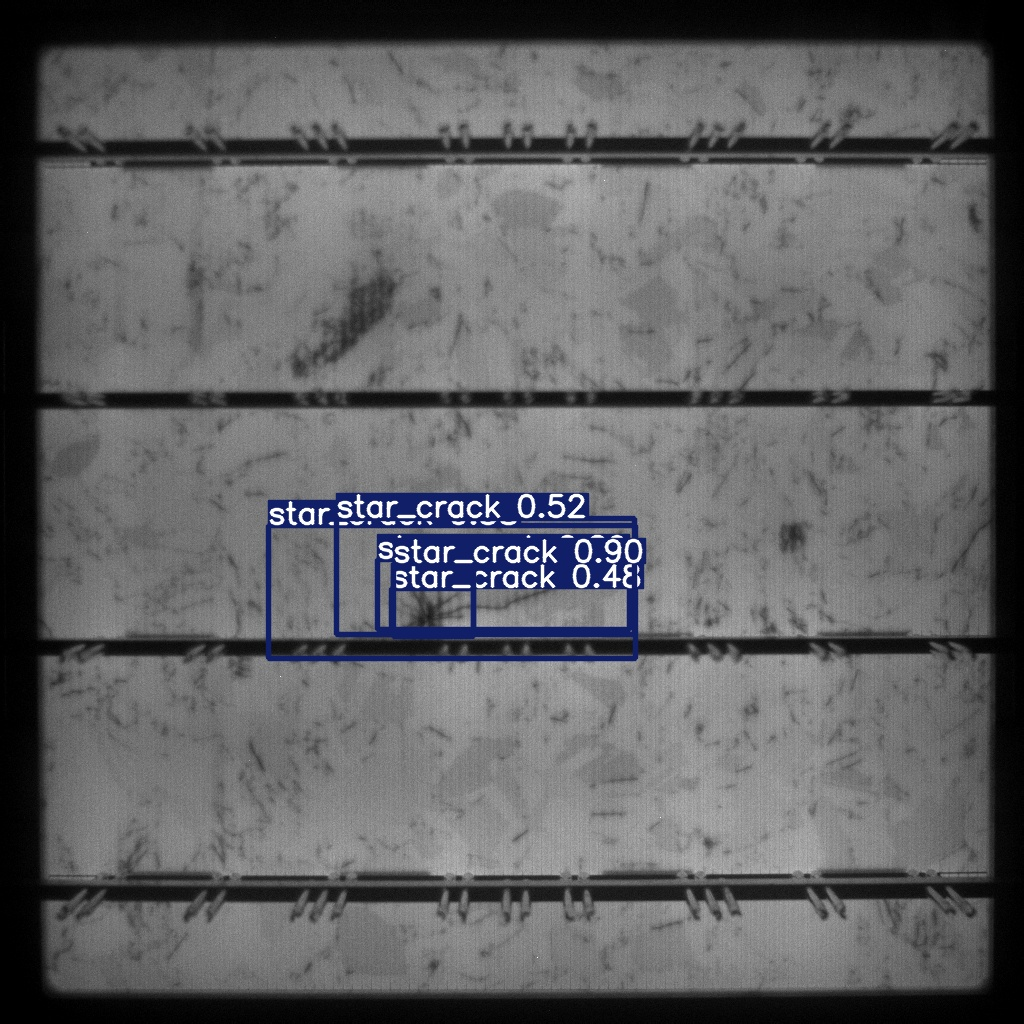


image 1/1 /content/drive/MyDrive/Solar Panels Defect Detection/sample_dataset/test/images/img001454.jpg: 512x512 (no detections), 44.7ms
Speed: 2.1ms preprocess, 44.7ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)


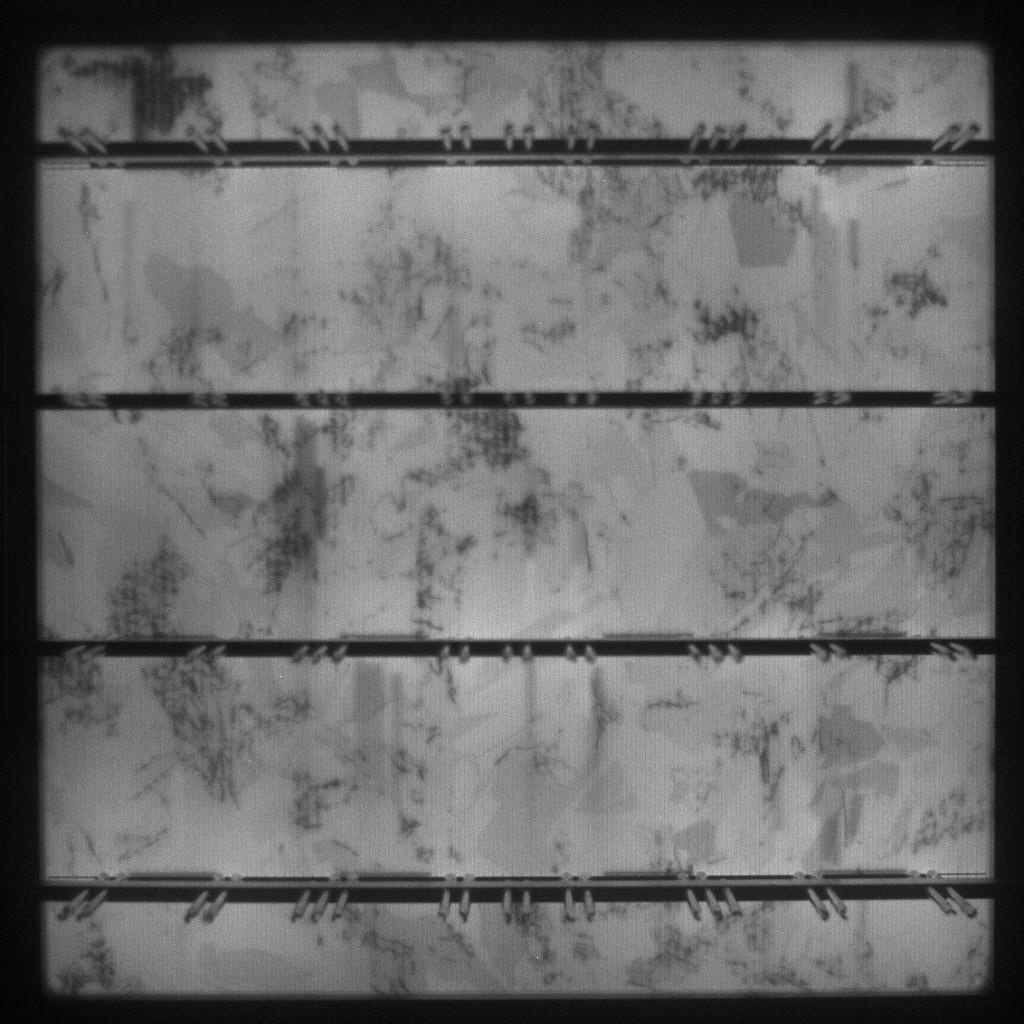


image 1/1 /content/drive/MyDrive/Solar Panels Defect Detection/sample_dataset/test/images/img000505.jpg: 512x512 1 black_core, 43.1ms
Speed: 2.9ms preprocess, 43.1ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)


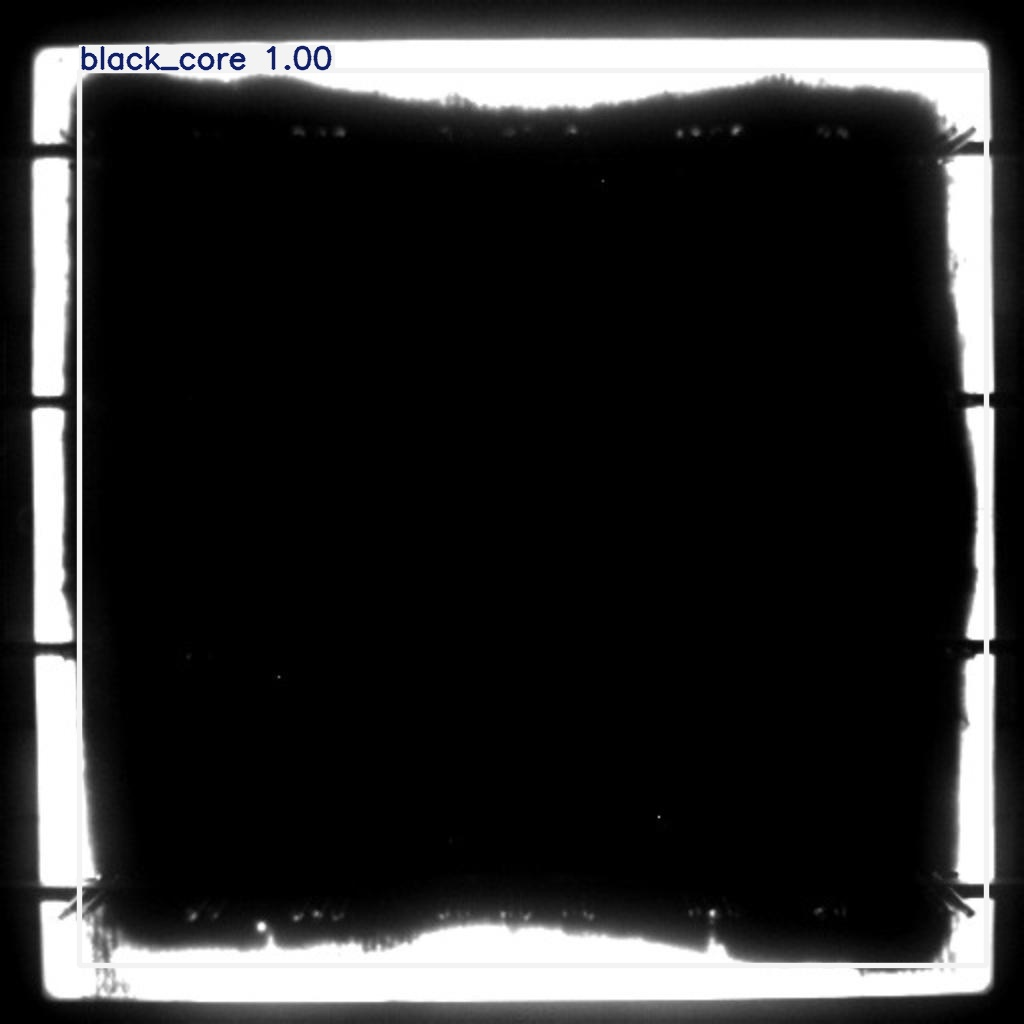

In [ ]:
# Step 8: Run Inference on Test Images
test_img_dir = TEST_IMAGES
test_images = [os.path.join(test_img_dir, x) for x in os.listdir(test_img_dir)[:5] if x.endswith(('.jpg', '.png', '.jpeg'))]

for img_path in test_images:
    results = model(img_path)
    output_path = img_path.replace('.jpg', '_pred.jpg').replace('.png', '_pred.png')
    results[0].save(output_path)
    display(Image(output_path))

In [ ]:
# Step 9: Save and Export the Model
model.save('/content/drive/MyDrive/Solar Panels Defect Detection/best_model.pt')

# Optional: Export to ONNX or TFLite for deployment
model.export(format='onnx')  # For Windows/Linux
# model.export(format='tflite')  # For edge devices

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)

PyTorch: starting from '/content/runs/detect/solar_defect_detection_v13/weights/best.pt' with input shape (1, 3, 512, 512) BCHW and output shape(s) (1, 16, 5376) (21.5 MB)

ONNX: starting export with onnx 1.19.1rc1 opset 22...
ONNX: slimming with onnxslim 0.1.70...
ONNX: export success ✅ 1.4s, saved as '/content/runs/detect/solar_defect_detection_v13/weights/best.onnx' (42.6 MB)

Export complete (2.0s)
Results saved to /content/runs/detect/solar_defect_detection_v13/weights
Predict:         yolo predict task=detect model=/content/runs/detect/solar_defect_detection_v13/weights/best.onnx imgsz=512  
Validate:        yolo val task=detect model=/content/runs/detect/solar_defect_detection_v13/weights/best.onnx imgsz=512 data=dataset.yaml  
Visualize:       https://netron.app


'/content/runs/detect/solar_defect_detection_v13/weights/best.onnx'

In [ ]:
import cv2
import numpy as np
from PIL import Image
import os

# Load the full panel image
panel_img = cv2.imread('Panel2.jpg')
if panel_img is None:
    print("❌ Could not load image. Check file path.")
else:
    print(f"✅ Loaded image: {panel_img.shape}")


n_rows = 6
n_cols = 10

height, width, _ = panel_img.shape
cell_h = height // n_rows
cell_w = width // n_cols

# Create temporary folder for cropped cells
os.makedirs('/content/cells', exist_ok=True)
cell_paths = []

for r in range(n_rows):
    for c in range(n_cols):
        y1 = r * cell_h
        y2 = (r + 1) * cell_h
        x1 = c * cell_w
        x2 = (c + 1) * cell_w

        cell_img = panel_img[y1:y2, x1:x2]
        cell_path = f'/content/cells/cell_{r}_{c}.jpg'
        cv2.imwrite(cell_path, cell_img)
        cell_paths.append(cell_path)

print(f"✅ Cropped {len(cell_paths)} cells from the full panel")

✅ Loaded image: (319, 620, 3)
✅ Cropped 60 cells from the full panel


In [ ]:
#Trying the model out!


from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/Solar Panels Defect Detection/best_model.pt')

print("✅ Model loaded successfully!")



✅ Model loaded successfully!



image 1/1 /content/Panel2.jpg: 288x512 1 horizontal_dislocation, 42.8ms
Speed: 1.1ms preprocess, 42.8ms inference, 1.2ms postprocess per image at shape (1, 3, 288, 512)


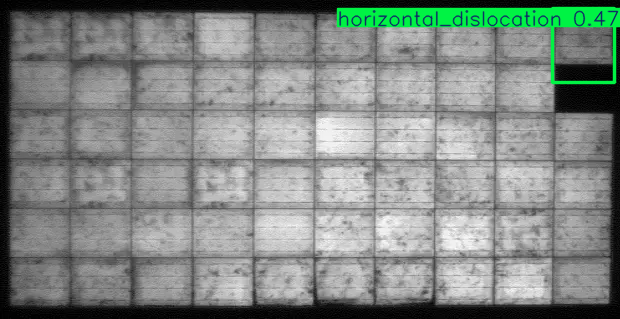

Detected: horizontal_dislocation (confidence: 0.47)


In [ ]:
results = model('Panel2.jpg')

results[0].show()

for box in results[0].boxes:
    cls_id = int(box.cls)
    conf = float(box.conf)
    label = model.names[cls_id]
    print(f"Detected: {label} (confidence: {conf:.2f})")


image 1/1 /content/Panel3.jpg: 320x512 43 black_cores, 31 horizontal_dislocations, 48.7ms
Speed: 2.4ms preprocess, 48.7ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 512)


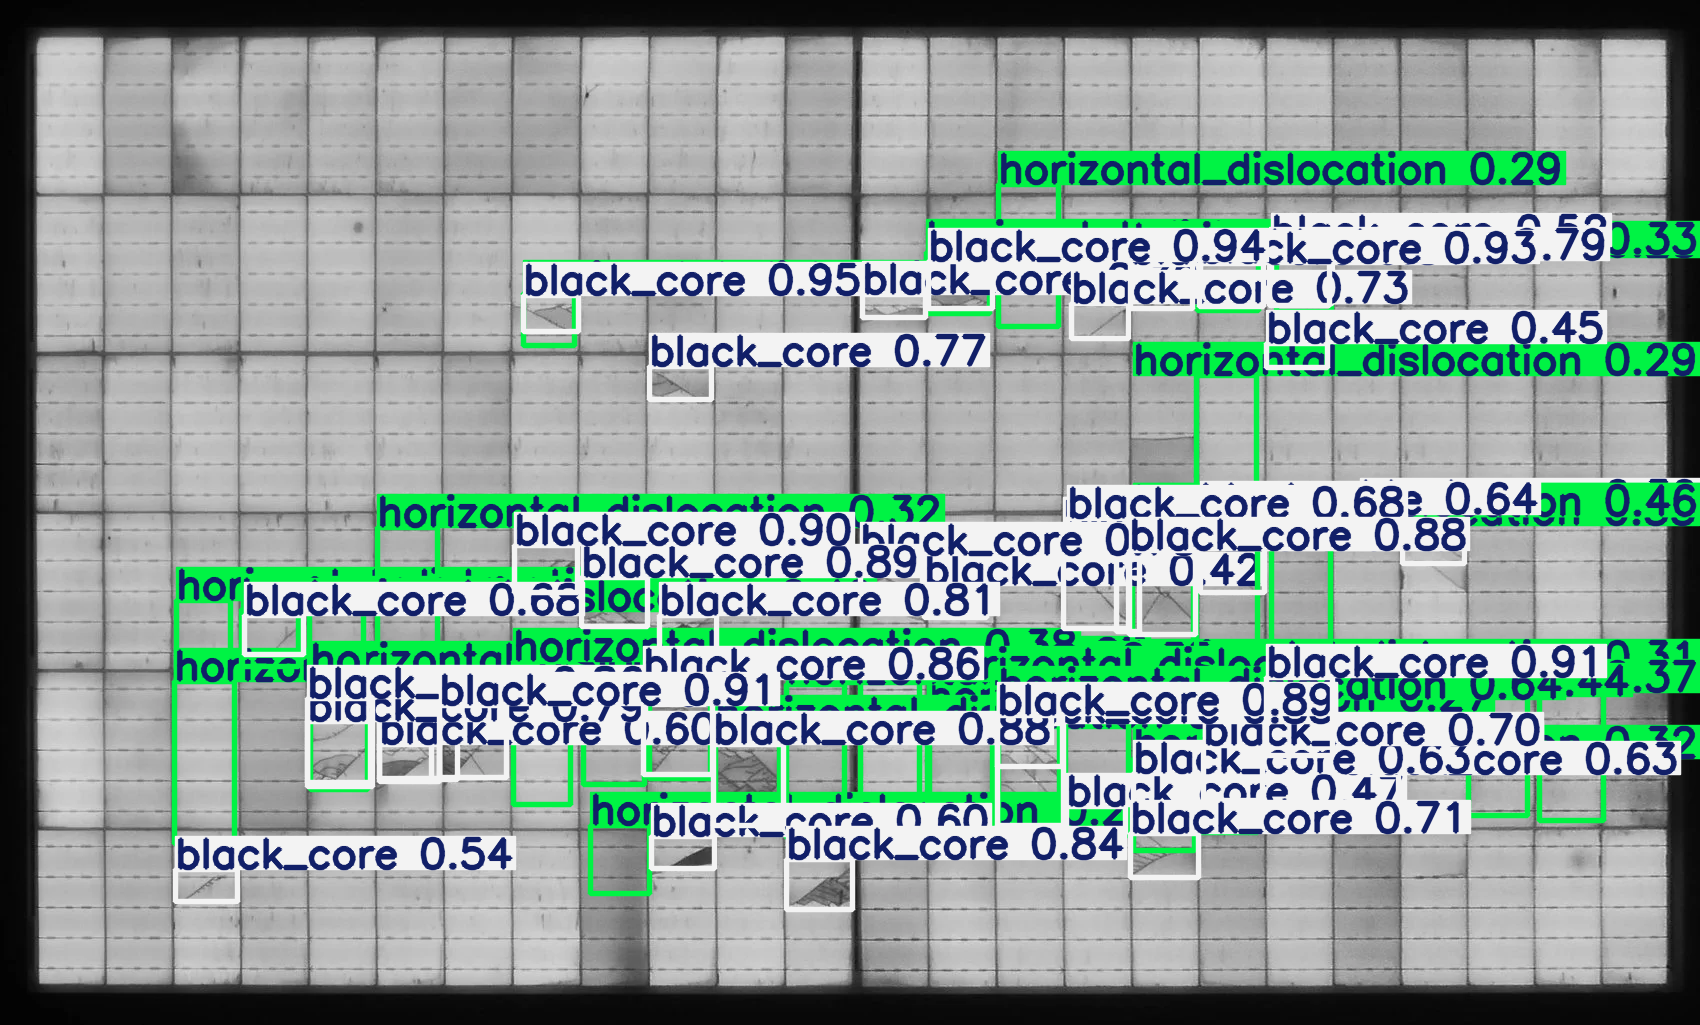

Detected: black_core (confidence: 0.95)
Detected: black_core (confidence: 0.94)
Detected: black_core (confidence: 0.93)
Detected: black_core (confidence: 0.91)
Detected: black_core (confidence: 0.91)
Detected: black_core (confidence: 0.90)
Detected: black_core (confidence: 0.89)
Detected: black_core (confidence: 0.89)
Detected: black_core (confidence: 0.88)
Detected: black_core (confidence: 0.88)
Detected: black_core (confidence: 0.86)
Detected: black_core (confidence: 0.86)
Detected: black_core (confidence: 0.84)
Detected: black_core (confidence: 0.83)
Detected: black_core (confidence: 0.81)
Detected: black_core (confidence: 0.81)
Detected: black_core (confidence: 0.79)
Detected: black_core (confidence: 0.79)
Detected: black_core (confidence: 0.77)
Detected: black_core (confidence: 0.75)
Detected: black_core (confidence: 0.73)
Detected: black_core (confidence: 0.71)
Detected: black_core (confidence: 0.70)
Detected: black_core (confidence: 0.68)
Detected: black_core (confidence: 0.68)


In [ ]:
results = model('Panel3.jpg', imgsz=512)

results[0].show()

for box in results[0].boxes:
    cls_id = int(box.cls)
    conf = float(box.conf)
    label = model.names[cls_id]
    print(f"Detected: {label} (confidence: {conf:.2f})")

In [ ]:
results = model('Panel3.jpg', imgsz=512)

# Create a list of boxes with confidence >= 0.5
high_conf_boxes = [box for box in results[0].boxes if float(box.conf) >= 0.5]

# Create a new Results object with only high-confidence detections
from ultralytics.engine.results import Results
high_conf_results = Results(
    orig_img=results[0].orig_img,
    path=results[0].path,
    names=results[0].names,
    boxes=results[0].boxes[high_conf_boxes]
)

# Show result with only high-confidence detections
high_conf_results.show()

# Print detected classes with high confidence
print("Detected defects (50% or higher confidence):")
for box in results[0].boxes:
    cls_id = int(box.cls)
    conf = float(box.conf)
    if conf >= 0.5:
        label = model.names[cls_id]
        print(f"Detected: {label} (confidence: {conf:.2f})")


image 1/1 /content/Panel3.jpg: 320x512 43 black_cores, 31 horizontal_dislocations, 10.7ms
Speed: 2.3ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 512)


In [ ]:
results = model('Panel2.jpg', imgsz=1280, conf=0.5, iou=0.5)  # Use larger size for big image

results[0].plot()
from PIL import Image
Image.fromarray(results[0].plot()).show()

results[0].save(filename='Panel_Detection_Result.png')

In [ ]:
import cv2
import numpy as np
from PIL import Image
import os

panel_img = cv2.imread('Panel3.jpg')
if panel_img is None:
    raise FileNotFoundError("Image not found. Check filename and path.")

h, w, _ = panel_img.shape

n_rows = 6
n_cols = 10
cell_h = h // n_rows
cell_w = w // n_cols

os.makedirs('/content/predictions', exist_ok=True)
all_boxes = []

# Process each cell
for r in range(n_rows):
    for c in range(n_cols):
        y1, y2 = r * cell_h, (r + 1) * cell_h
        x1, x2 = c * cell_w, (c + 1) * cell_w

        cell_img = panel_img[y1:y2, x1:x2]
        cell_path = f'/content/cell_{r}_{c}.jpg'
        cv2.imwrite(cell_path, cell_img)

        # Predict on this cell
        results = model(cell_path, imgsz=512)
        boxes = results[0].boxes

        if len(boxes) > 0:
            for box in boxes:
                cls_id = int(box.cls)
                conf = float(box.conf)
                label = model.names[cls_id]

                # Convert bounding box back to full-panel coordinates
                xyxy = box.xyxy[0].cpu().numpy()
                x_min = int(xyxy[0] + x1)
                y_min = int(xyxy[1] + y1)
                x_max = int(xyxy[2] + x1)
                y_max = int(xyxy[3] + y1)

                all_boxes.append((x_min, y_min, x_max, y_max, label, conf))

In [ ]:
# Copy original image and draw all detected defects
annotated_panel = panel_img.copy()

for (x_min, y_min, x_max, y_max, label, conf) in all_boxes:
    # Setting a color per class (BGR)
    colors = {
        'crack': (0, 0, 255),
        'corner': (0, 255, 255),
        'fragment': (255, 0, 0),
        'printing_error': (255, 255, 0),
        'scratch': (0, 255, 0)
    }
    color = colors.get(label, (255, 0, 255))  # Default magenta

    cv2.rectangle(annotated_panel, (x_min, y_min), (x_max, y_max), color, 2)
    cv2.putText(annotated_panel, f"{label} {conf:.2f}",
                (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Save and display
cv2.imwrite('Final_Panel_With_Defects.png', annotated_panel)
Image.fromarray(cv2.cvtColor(annotated_panel, cv2.COLOR_BGR2RGB))

In [ ]:
from collections import Counter

detected_labels = [label for _, _, _, _, label, _ in all_boxes]
counts = Counter(detected_labels)

print("\n📋 DEFECT DETECTION REPORT")
print("="*40)
if detected_labels:
    for label, count in counts.items():
        print(f"🔴 {label}: {count} occurrence(s)")
    print(f"\nTotal Defects Found: {len(detected_labels)}")
else:
    print("🟢 No defects detected — all cells appear healthy!")

with open('defect_report.csv', 'w') as f:
    f.write("Row,Col,Xmin,Ymin,Xmax,Ymax,Label,Confidence\n")
    for i, (x1, y1, x2, y2, label, conf) in enumerate(all_boxes):
        row = i // n_cols
        col = i % n_cols
        f.write(f"{row},{col},{x1},{y1},{x2},{y2},{label},{conf}\n")

In [ ]:
results = model('Panel6.png', imgsz=512)

results[0].show()

for box in results[0].boxes:
    cls_id = int(box.cls)
    conf = float(box.conf)
    label = model.names[cls_id]
    print(f"Detected: {label} (confidence: {conf:.2f})")

In [ ]:
results = model('Panel7.png', imgsz=512)

results[0].show()

for box in results[0].boxes:
    cls_id = int(box.cls)
    conf = float(box.conf)
    label = model.names[cls_id]
    print(f"Detected: {label} (confidence: {conf:.2f})")